In [1]:
import sys
sys.path.insert(0,'D:\\projectsCertificates\\syntheticFraud\\sfraud\\lib\\site-packages') #setting the path variable to the packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
synthetic_data = pd.read_csv('PS_20174392719_1491204439457_log.csv') #importing the data
print("dataset size is " + str(synthetic_data.size) + "  and fraudulent cases are " + str(synthetic_data[synthetic_data["isFraud"]==1].size))
synthetic_data.head()

dataset size is 69988820  and fraudulent cases are 90343


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


<AxesSubplot:>

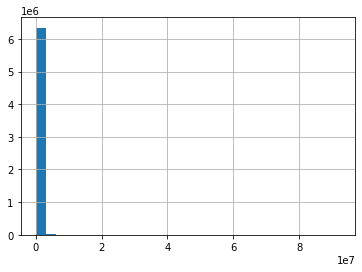

In [4]:
synthetic_data['amount'].hist(bins=30)

<AxesSubplot:>

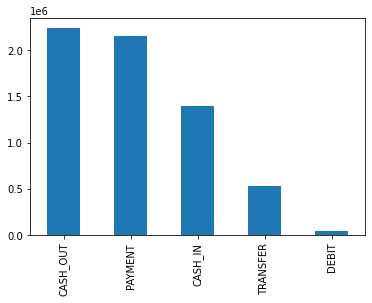

In [5]:
synthetic_data['type'].value_counts().plot(kind='bar')

<AxesSubplot:>

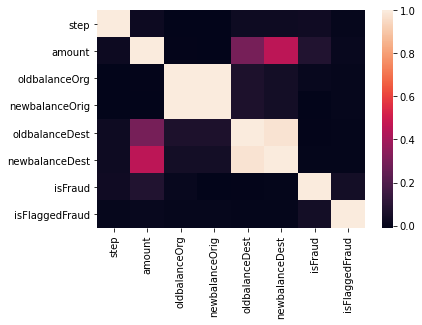

In [6]:
import seaborn as sns
corr = synthetic_data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [7]:
del synthetic_data['type']
del synthetic_data['nameOrig']
del synthetic_data['nameDest']
synthetic_data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [8]:
predictors = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'] #normalizing the predictors values to avoid bias in neural network output
synthetic_data[predictors] = synthetic_data[predictors]/synthetic_data[predictors].max()
synthetic_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,0.327587,0.191564,0.001346,0.209960,0.321669,0.450875,1.0
amount,6362620.0,0.001946,0.006532,0.000000,0.000145,0.000810,0.002258,1.0
oldbalanceOrg,6362620.0,0.013995,0.048473,0.000000,0.000000,0.000238,0.001801,1.0
newbalanceOrig,6362620.0,0.017245,0.058970,0.000000,0.000000,0.000000,0.002909,1.0
oldbalanceDest,6362620.0,0.003092,0.009548,0.000000,0.000000,0.000373,0.002649,1.0
newbalanceDest,6362620.0,0.003439,0.010315,0.000000,0.000000,0.000603,0.003122,1.0
isFraud,6362620.0,0.001291,0.035905,0.000000,0.000000,0.000000,0.000000,1.0
isFlaggedFraud,6362620.0,0.000003,0.001586,0.000000,0.000000,0.000000,0.000000,1.0


In [9]:
X = synthetic_data[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] #features in the dataset
y = synthetic_data['isFraud'] #This is the target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42) #splitting the data into train and test sets
print(X_train.shape)
print(X_test.shape)

(3181310, 6)
(3181310, 6)


In [10]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(6,6), activation='relu', solver='adam', max_iter=500, verbose=True)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

Iteration 1, loss = 0.01951259
Iteration 2, loss = 0.00806931
Iteration 3, loss = 0.00668662
Iteration 4, loss = 0.00546352
Iteration 5, loss = 0.00492662
Iteration 6, loss = 0.00473941
Iteration 7, loss = 0.00462867
Iteration 8, loss = 0.00454881
Iteration 9, loss = 0.00450000
Iteration 10, loss = 0.00446548
Iteration 11, loss = 0.00443888
Iteration 12, loss = 0.00441453
Iteration 13, loss = 0.00439439
Iteration 14, loss = 0.00437374
Iteration 15, loss = 0.00434979
Iteration 16, loss = 0.00433292
Iteration 17, loss = 0.00433134
Iteration 18, loss = 0.00431704
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [11]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

print(precision_score(y_test, predict_test))
print(recall_score(y_test, predict_test))
print(f1_score(y_test, predict_test))
print(accuracy_score(y_test, predict_test))

0.941924778761062
0.4137512147716229
0.5749493585415261
0.9992085021579161
